In [1]:
import pandas as pd
d=pd.read_csv("insurance_data.csv")
d

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [2]:
d.columns[d.isna().any()]

Index([], dtype='object')

In [3]:
d.describe()

,age,bought_insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 564.0 bytes


In [5]:
#x=d.iloc[:,0]
x=d[["age"]]
y=d["bought_insurance"]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
model=LogisticRegression()
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [15]:
y_pred=model.predict([[45]])
y_pred

C:\Users\Livewire\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [11]:
y_test

8     1
13    0
9     1
21    0
0     0
11    0
Name: bought_insurance, dtype: int64

C:\Users\Livewire\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


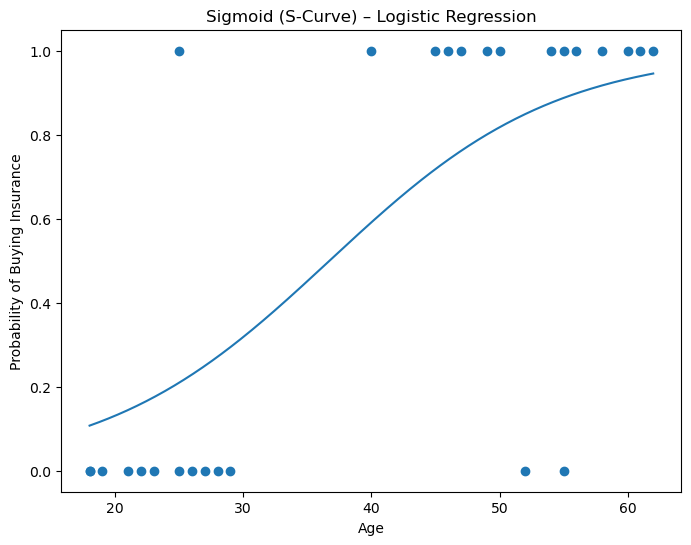

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Generate smooth age values
age_range = np.linspace(d['age'].min(), d['age'].max(), 300).reshape(-1, 1)

# Predict probabilities (this gives the sigmoid curve)
probabilities = model.predict_proba(age_range)[:, 1]

# Plot
plt.figure(figsize=(8,6))
plt.scatter(x, y)                # actual data points
plt.plot(age_range, probabilities)  # sigmoid curve
plt.xlabel("Age")
plt.ylabel("Probability of Buying Insurance")
plt.title("Sigmoid (S-Curve) – Logistic Regression")
plt.show()